In [5]:
import os 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sql_functions import read_query

<h1 style="color:'red; font-family:roboto; font-size:50px">This is a Project on 'E-Commerce Sales '


                                                        E-Commerce Sales Data Analysis
                                                          Practical Type Questions
Client: SwiftMarket

Sales Period: 2023

You are a Data Analyst, expert in analyzing, summarizing and visualizing the data.
One of your clients, an E-commerce giant, wants you to analyze their sales last year.

The following are the questions asked by the client. Prepare a report for them.

Project's Questions: 

1. Provide a visual representation of our annual sales performance over time?
2. The client is interested in understanding how the sales have been fluctuating
over time to identify any underlying patterns or anomalies Analyze the trend in
our monthly sales using a moving average technique
3. Explore the month-over-month growth rate in sales.
4. identify the top-performing sales representatives based on their total sales
volume
5. What are the total sales made by each employee?
6. Which category has the highest total sales?
7. How many customers are there in each state?
8. What is the average quantity of each product sold?
9. Which supplier has the highest total sales?
10. What is the total revenue generated from sales in each state?
11. How many sales were made by each customer?
12. What is the total salary expenditure on employees in each department?
13. Which subcategory has the highest average unit price?
14. What is the total revenue generated from sales in each category













# 1. Provide a visual representation of our annual sales performance over time?

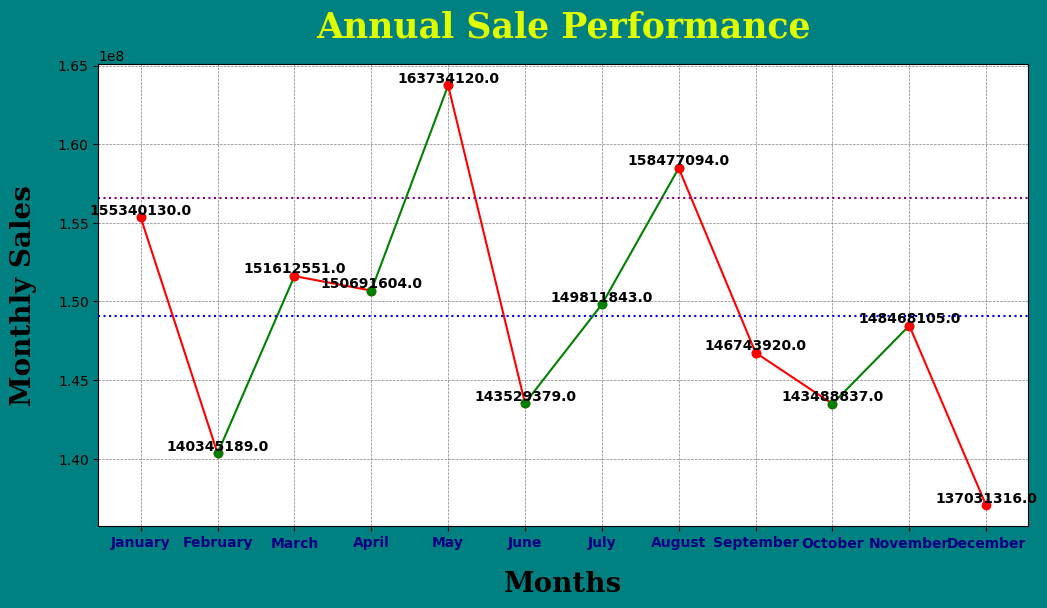

In [14]:
#SQL Query
query='''select Months , M_sales
from (select month(SaleDate),monthname(SaleDate) as Months,
    sum(TotalPrice) as M_sales
    from salesdata
        group by month(SaleDate),Months
        order by month(SaleDate)) t;'''

#Executing Query
df = read_query(query=query)

#Assign Variable and extracting the values 
Months = df['Months'].values

# # need to change the datatype of the expentiure onject into numbers (float or int)
Monthly_sales=df['M_sales'].astype(float).values
monthly_avg=df['M_sales'].mean()

previous=Monthly_sales[0]
m=1


#Ploting Graph
plt.figure(figsize=(12,6),facecolor='teal')
plt.plot(Months[0],previous,marker='o')

for i in Monthly_sales[1:]:
    if i>previous:
        plt.plot([Months[m-1],Months[m]],[previous,i],color='green',marker='o')
    else:
        plt.plot([Months[m-1],Months[m]],[previous,i],color='red',marker='o')
    previous=i
    m+=1

# giving title to the graph
plt.title('Annual Sale Performance',fontdict={'family':'serif','size':25,'color':'#DFFF00'},pad=20,fontweight='bold')

# puting labels onto x and y labels
plt.xlabel("Months",fontdict={'family':'serif','size':20,'color':'black'},labelpad=15,fontweight='bold')
plt.ylabel("Monthly Sales",fontdict={'family':'serif','size':20,'color':'black'},labelpad=15,fontweight='bold')


#  seting the standard goal
goal = monthly_avg*1.05

# giving axhline
plt.axhline(y=monthly_avg,color='blue',ls='dotted')
plt.axhline(y=goal,color='purple',ls='dotted')

plt.xticks(c='#000080',fontweight='bold')



#Annotating Graph
for j in range(len(Months)):
    plt.annotate(text=Monthly_sales[j],xy=(j,Monthly_sales[j]),fontweight='bold',
                horizontalalignment='center',
                verticalalignment='bottom')

plt.grid(linestyle='--',color='gray',linewidth=0.5)
plt.show()

### 2. The client is interested in understanding how the sales have been fluctuating over time to identify any underlying patterns or anomalies Analyze the trend in our monthly sales using a moving average technique

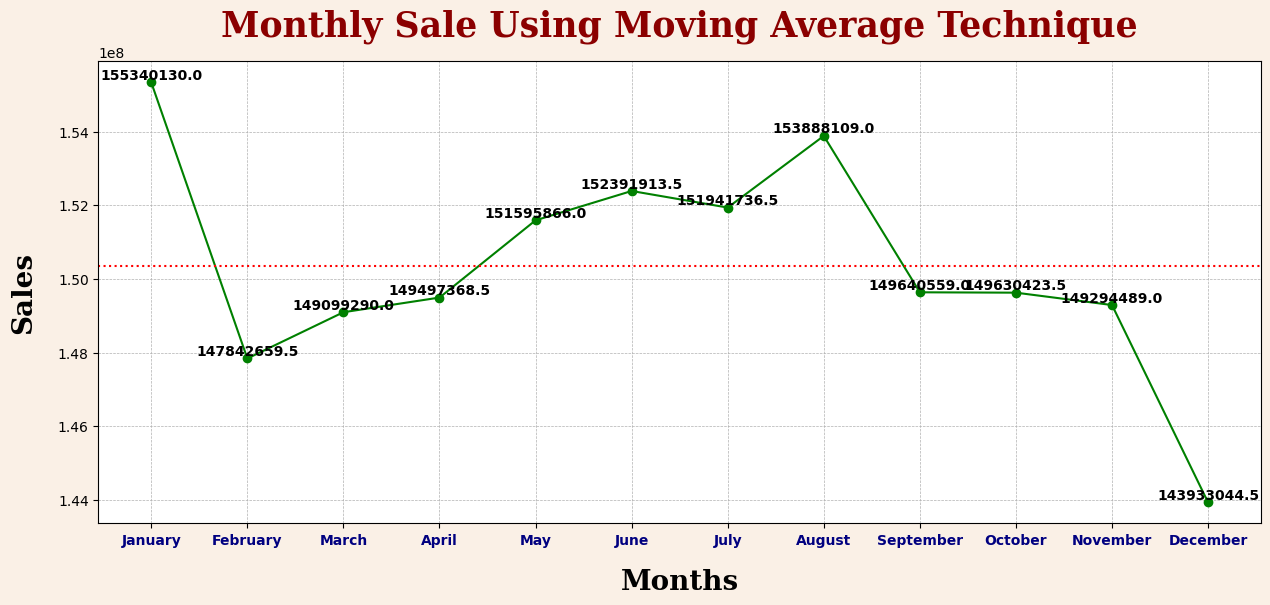

In [7]:
#SQL Query
query='''select Months, 
avg(monthlysale) over(order by monthnum rows between 3 
preceding and current row) as moving_average
from  
(select 
month(SaleDate) as monthnum, Monthname(SaleDate) as Months,sum(TotalPrice) as monthlysale
from salesdata
group by monthnum,Months) t;'''

#Query Execution
monthly_sale = read_query(query=query)

#Variables and extracting the values 
months=monthly_sale['Months'].values

# changing the datatype from object to float 
sale=monthly_sale['moving_average'].astype(float).values
monthly_avg=monthly_sale['moving_average'].mean()

#Ploting Graph
plt.figure(figsize=(15,6),facecolor='linen')
plt.plot(months,sale,color='green',marker='o')
plt.title('Monthly Sale Using Moving Average Technique',pad=18,fontdict={'family':'serif','size':25,'color':'darkred'},fontweight='bold')

# GIVING LABELS TO THE X AND Y LABELS
plt.xlabel('Months',fontdict={'family':'serif','size':20,'color':'BLACK'},labelpad=15,fontweight='bold')
plt.ylabel('Sales',fontdict={'family':'serif','size':20,'color':'BLACK'},labelpad=15,fontweight='bold')


plt.axhline(y=monthly_avg,color='red',ls='dotted')

# USING XTICKS
plt.xticks(c='#000080',fontweight='bold')


#Annotating Graph
for i in range(len(months)):
    plt.annotate(text=sale[i],xy=(i,sale[i]),fontweight='bold',
    horizontalalignment='center',
    verticalalignment='bottom')

#Grid
plt.grid(ls='--',lw=0.5)
plt.show()

# 3. Explore the month-over-month growth rate in sales

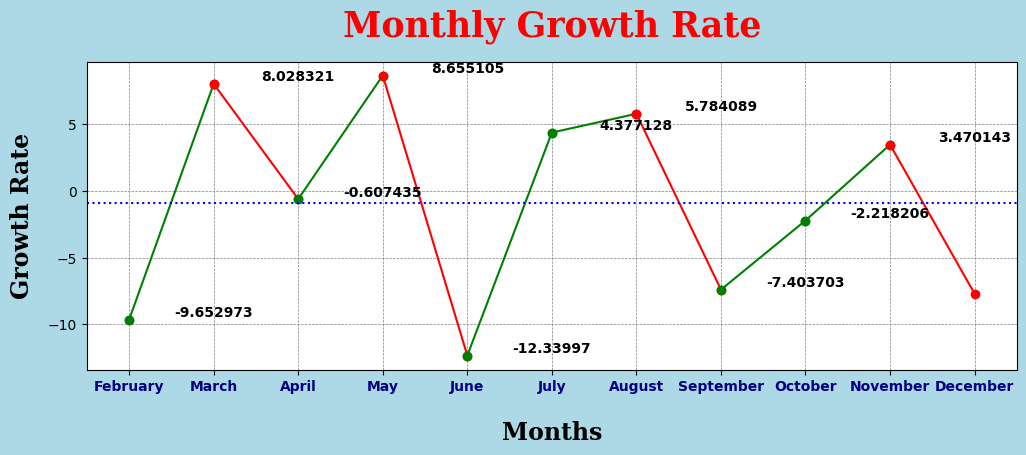

In [8]:
#SQL Query
query = '''select months,T_sales,
        lag(T_sales) over(),
        100*(T_sales-lag(T_sales) over())/lag(T_sales) over() as Growth_Rate
from (select month(SaleDate),monthname(SaleDate) as months,sum(TotalPrice) as T_sales
     from salesdata
     group by month(SaleDate),months
     order by month(SaleDate)) t;'''

#Query Executing
G_rate=read_query(query=query)

#creating Variable and extracting the values
Month=G_rate['months'].values

# changing the datatype from object to float
G_rate['Growth_Rate']=G_rate['Growth_Rate'].astype(float)
Growth=G_rate['Growth_Rate'].values

# extracting the mean 
Avg_growth=G_rate['Growth_Rate'].mean()

#Ploting Graph
plt.figure(figsize=(12,4),facecolor='lightblue')
#plt.plot(Month,Growth,color='darkgreen',marker='o')

previous=Growth[1]
m=2


plt.plot(Month[1],previous,marker='o')

for j in Growth[2:]:
    if j>previous:
        plt.plot([Month[m-1],Month[m]],[previous,j],color='green',marker='o')
    else:
        plt.plot([Month[m-1],Month[m]],[previous,j],color='red',marker='o')
    previous=j
    m+=1
    
plt.axhline(Avg_growth,color='blue',ls='dotted')

# giving title to the graph
plt.title("Monthly Growth Rate",fontdict={'family':'serif','size':25,'color':'red'},pad=18,fontweight='bold')

# creating labels for x and y 
plt.xlabel("Months",fontdict={'family':'serif','size':17,'color':'black'},labelpad=20,fontweight='bold')
plt.ylabel("Growth Rate",fontdict={'family':'serif','size':17,'color':'black'},labelpad=10,fontweight='bold')

# USING XTICKS
plt.xticks(c='#000080',fontweight='bold')


#Annotating Graph
for i in range(len(Month)):
    plt.annotate(text=Growth[i],xy=(i,Growth[i]),fontweight='bold',
                 horizontalalignment='center',
                 verticalalignment='bottom')
    
    

plt.grid(linestyle='--',linewidth=0.5,color='gray')
plt.show()

## 4. identify the top-performing sales representatives based on their total sales volume

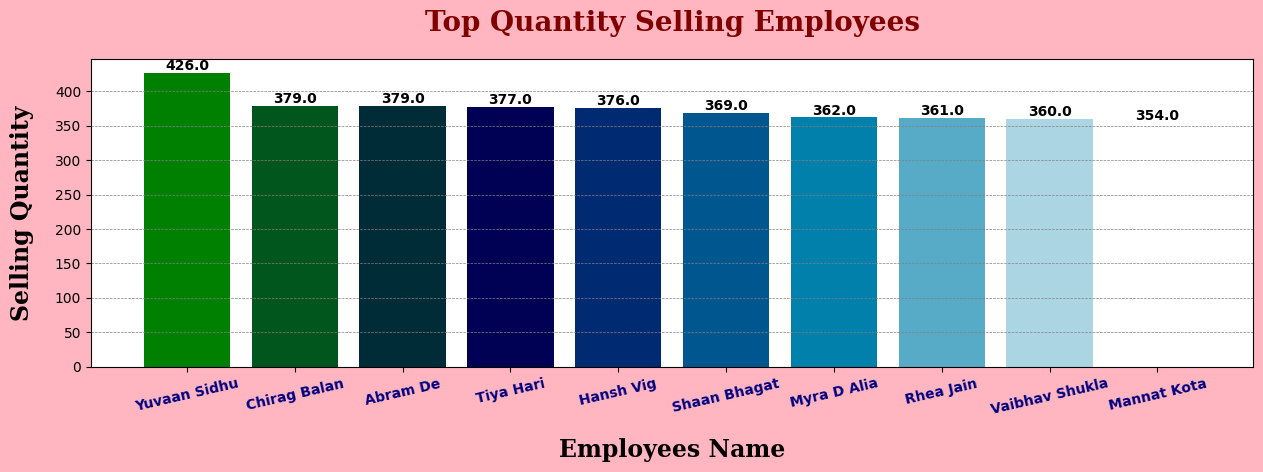

In [9]:
#Sql Query
query='''select 
	e.EmployeeID, concat(e.FirstName,' ',e.Lastname)as Emp_name,sum(s.Quantity) as Quantites,sum(s.TotalPrice) as Total_sales
from
	salesdata s
join
	employees e
on
	e.EmployeeID=s.EmployeeID
group by
	e.EmployeeID
order by
	Quantites desc
limit 10;'''

#Execute Query
Top_perf=read_query(query=query)

# creating Variables and extracting the vlaues 
Top_emp=Top_perf['Emp_name'].values

# changing the datatype from object to float
S_quantities=Top_perf['Quantites'].astype(float).values

# creating Cmap
cmap_value=np.linspace(0,1,10)
cmap=plt.cm.ocean(cmap_value)

#Ploting Graph
plt.figure(figsize=(15,4),facecolor='lightpink')
plt.bar(height=S_quantities,x=Top_emp,color=cmap)

# giving title to the tha graph
plt.title('Top Quantity Selling Employees',fontdict={'family':'serif','color':'maroon','size':20},pad=20,fontweight='bold')

# xreating the labels for x and y
plt.xlabel('Employees Name',fontdict={'family':'serif','color':'black','size':17},labelpad=15,fontweight='bold')
plt.ylabel('Selling Quantity',fontdict={'family':'serif','color':'black','size':17},labelpad=15,fontweight='bold')

# USING XTICKS
plt.xticks(rotation=13,c='#000080',fontweight='bold')

#Annotate graph
for i in range(len(Top_emp)):
    plt.annotate(text=S_quantities[i],xy=(i,S_quantities[i]),fontweight='bold',
                 horizontalalignment='center',
				 verticalalignment='bottom')

plt.grid(axis='y',linestyle="--",linewidth=0.5,color='gray')
plt.show()

# 5. What are the total sales made by each employee?

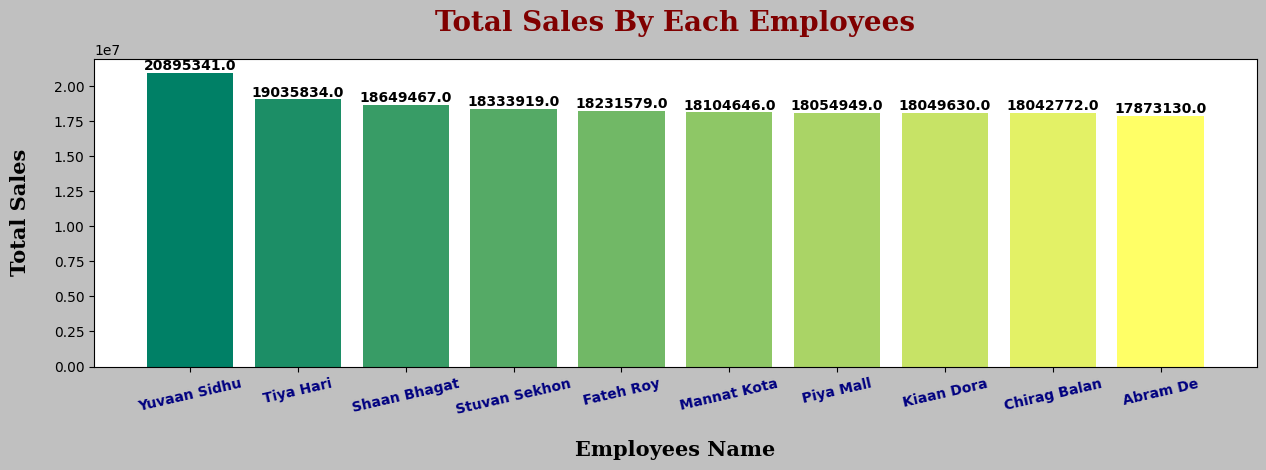

In [10]:
#Sql Query
query='''Select s.EmployeeID , concat(e.FirstName," ",e.LastName) as Emp_Name,sum(s.TotalPrice) as T_sales
from employees e
join salesdata s
on e.EmployeeID=s.EmployeeID
group by s.EmployeeID,Emp_Name
order by T_sales desc
limit 10;'''

#Execute Query
Emp_sales=read_query(query=query)

# creating the Variables and extracting the values
Employees=Emp_sales['Emp_Name'].values

# changing the datatype from object to float
T_sales=Emp_sales['T_sales'].astype(float).values

#Cmap Values
cmap_value=np.linspace(0,1,10)
cmap=plt.cm.summer(cmap_value)

#Ploting Graph
plt.figure(figsize=(15,4),facecolor='silver')
plt.bar(height=T_sales,x=Employees,color=cmap)

# giving title to the graph
plt.title('Total Sales By Each Employees',fontdict={'family':'serif','size':20,'color':'maroon'},pad=20,fontweight='bold')

# creating the labels for x and y labels
plt.xlabel('Employees Name',fontdict={'family':'serif','size':15,'color':'black'},labelpad=17,fontweight='bold')
plt.ylabel('Total Sales',fontdict={'family':'serif','size':15,'color':'black'},labelpad=17,fontweight='bold')

# using xticks 
plt.xticks(rotation=13,c='#000080',fontweight='bold')

#Annotating Graph
for i in range(len(Employees)):
    plt.annotate(text=T_sales[i],xy=(i,T_sales[i]),fontweight='bold',
                 horizontalalignment='center',
                 verticalalignment='bottom')

#plt.grid(linestyle='--',linewidth=0.5,color='gray')
plt.show()

# 6. Which category has the highest total sales?

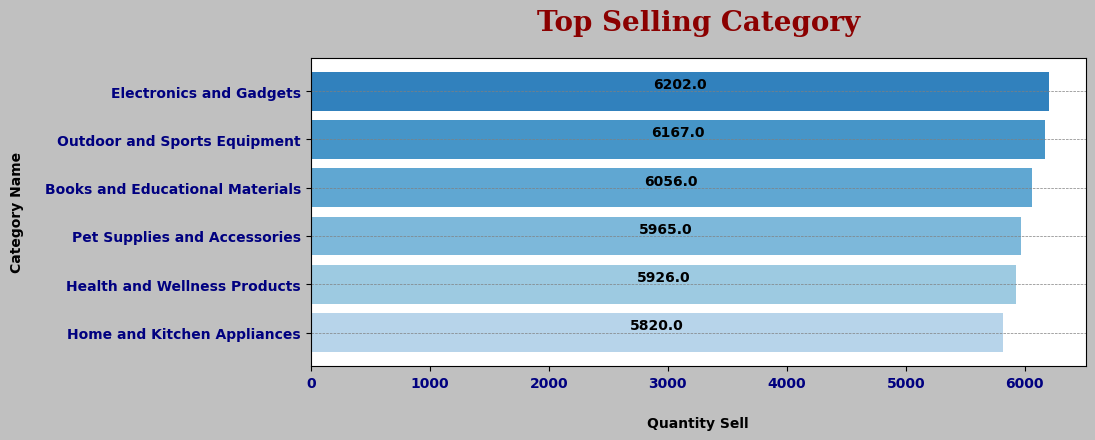

In [11]:
#Sql Query
query = '''select 
    c.Categoryname,c.CategoryID ,sum(t.Quantity) as Total_Quantity,sum(t.TotalPrice) as Total_Price
from 
    categories c
join 
    (select s.SubcatID,s.Quantity,s.TotalPrice,a.CategoryID 
        from 
            salesdata s
    join 
        subcategories a
    on 
        s.SubcatID=a.SubcatID) t
on 
    c.CategoryID=t.CategoryID
group by 
    c.CategoryID
order by 
    Total_Quantity;'''

#Execute Query
H_category = read_query(query=query)

# creating the Variable and extracting the values
C_name=H_category['Categoryname'].values

# changing the datatype from object to float
H_category['Total_Quantity']=H_category['Total_Quantity'].astype(float)
T_quantity=H_category['Total_Quantity'].values

#Fonts
font={'family':'serif','color':'darkred','size':20}
fontx={'family':'serif','color':'black','size':18}
fonty={'family':'serif','color':'black','size':18}

#Cmap
cm_va=np.linspace(0.3,1,10)
cmap=plt.cm.Blues(cm_va)


#Ploting Graph
plt.figure(figsize=(10,4),facecolor='silver')
plt.barh(C_name,T_quantity,color=cmap)

# giving title to the graph
plt.title('Top Selling Category', fontdict=font, pad=20,fontweight='bold')

# creating the labels for x and y labels
plt.xlabel('Quantity Sell',labelpad=19,fontweight='bold')
plt.ylabel('Category Name',labelpad=15,fontweight='bold')


# using xticks 
plt.xticks(c='#000080',fontweight='bold')
# using yticks 
plt.yticks(c='#000080',fontweight='bold')

#Annotating Graph
for i in range(len(C_name)):
    plt.annotate(text=T_quantity[i],xy=(T_quantity[i]/2,i),fontweight='bold',
                 horizontalalignment='center',
                 verticalalignment='bottom',
                 color='black')
plt.grid(axis='y',linestyle='--',linewidth=0.5,color='gray')
plt.show()

# 7. How many customers are there in each state?

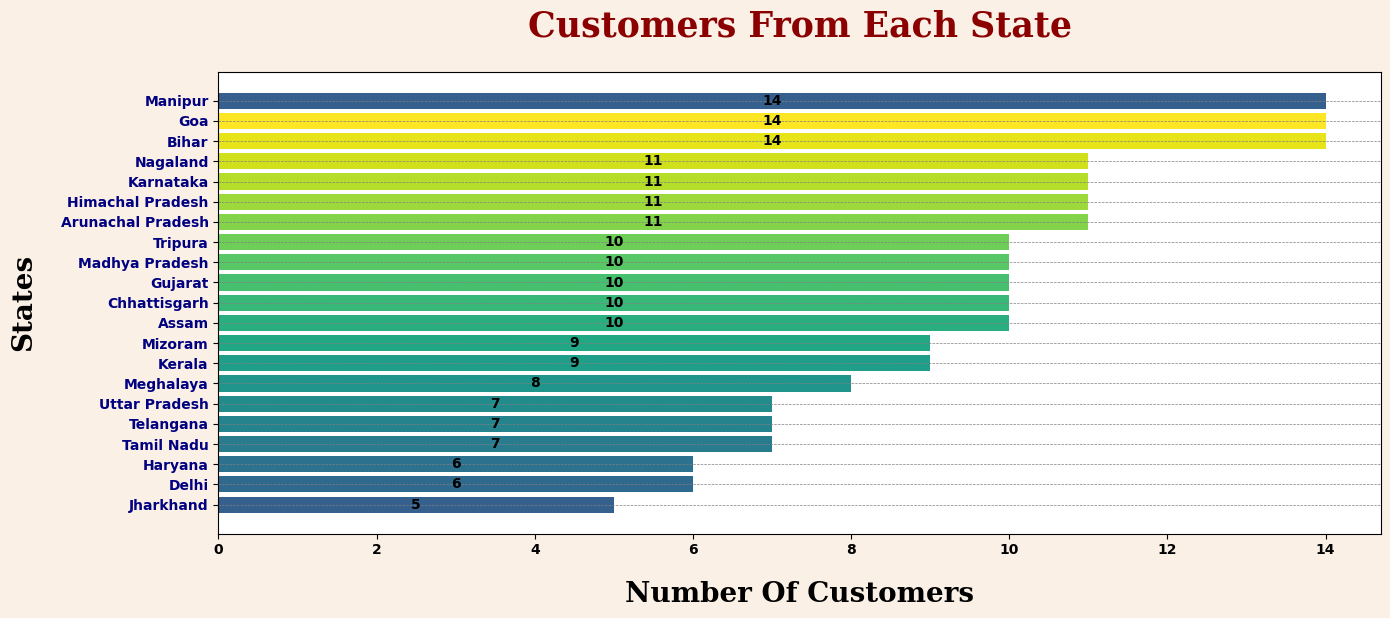

In [12]:
#Sql Query
query='''select State,count(distinct(CustomerID))  as Num_Cust
from customers
group by State
order by Num_Cust;'''

#Execute Query
C_state=read_query(query=query)

#Assign Variables and extracting the values
states=C_state['State'].values

# changing the datatype from object to int
N_cust=C_state['Num_Cust'].astype(int).values


# creating Cmap
cmap_value=np.linspace(0.3,1,20)
cmap=plt.cm.viridis(cmap_value)

#Fonts
font={'family':'serif','size':25,'color':'darkred'}
fontx={'family':'serif','size':20,'color':'black'}
fonty={'family':'serif','size':20,'color':'black'}

#Ploting Graph
plt.figure(figsize=(15,6),facecolor='linen')
#plt.plot(N_cust,states,color='darkred',marker='o')
plt.barh(y=states,width=N_cust,color=cmap)
plt.title('Customers From Each State',pad=25,fontdict=font,fontweight='bold')

# creating the labels for x and y labels
plt.xlabel('Number Of Customers',fontdict=fontx,fontweight='bold',labelpad=17)
plt.ylabel('States',fontdict=fonty,fontweight='bold',labelpad=17)

# using yticks and xticks
plt.yticks(c='#000080',fontweight='bold')
plt.xticks(fontweight='bold')


#Annotating Graph
for i in range(len(N_cust)):
    plt.annotate(text=N_cust[i],xy=(N_cust[i]/2,i),fontweight='bold',
                 horizontalalignment='center',
                 verticalalignment='center',color='black')

#Gridlines
plt.grid(axis='y',linestyle='--',linewidth=0.5,color='gray')
plt.show()

# 8. What is the average quantity of each product sold?

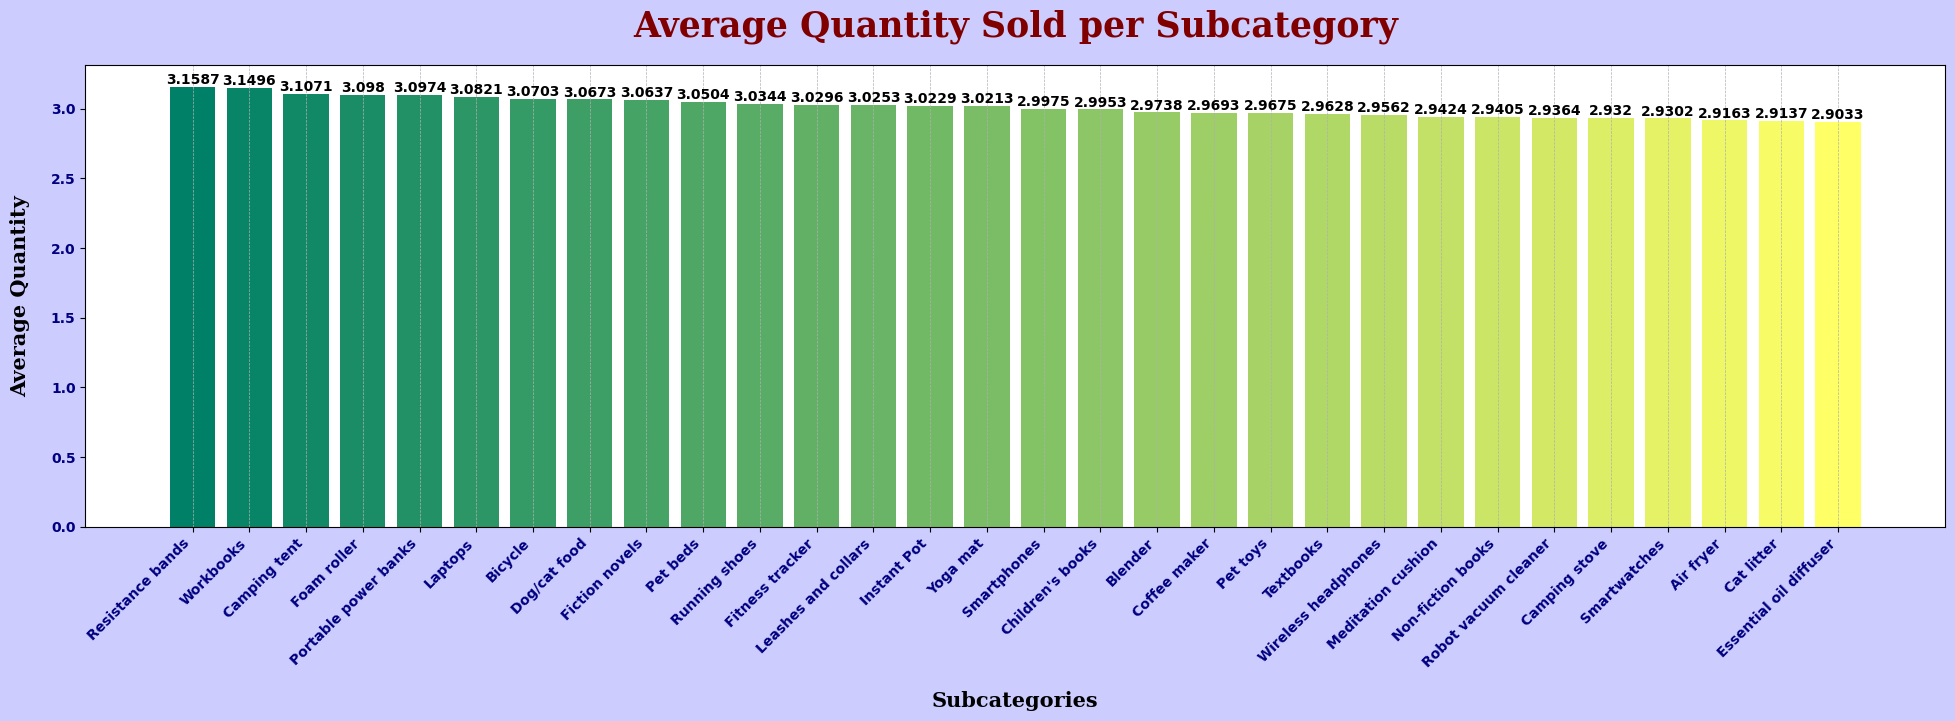

In [13]:
#SQL Query
query='''select 
	c.SubcatName,avg(s.Quantity) as Avg_quantity ,sum(s.TotalPrice) as Total_sales
from
	subcategories c
join
	salesdata s
on 
	c.SubcatID=s.SubcatID
group by 
	c.SubcatName
order by
	Avg_quantity desc;'''

#Execute Query
Avg_quant=read_query(query=query)

#Assign Variable
quantities=Avg_quant['Avg_quantity'].astype(float).values
subcategories=Avg_quant['SubcatName'].values

#Cmap
cmap_value=np.linspace(0,1,30)
cmap=plt.cm.summer(cmap_value)

#Ploting Graph
plt.figure(figsize=(24,6),facecolor='#CCCCFF')
plt.bar(subcategories, quantities, color=cmap)

# creating labels for x and y 
plt.xlabel('Subcategories',fontdict={'family':'serif','size':15,'color':'black'},labelpad=15,fontweight='bold')
plt.ylabel('Average Quantity',fontdict={'family':'serif','size':15,'color':'black'},labelpad=15,fontweight='bold')

# giving title to the graph
plt.title('Average Quantity Sold per Subcategory',fontdict={'family':'serif','size':25,'color':'maroon'},pad=20,fontweight='bold')
plt.xticks(rotation=45, ha='right')
#plt.tight_layout()

# using yticks and xticks
plt.yticks(c='#000080',fontweight='bold')
plt.xticks(c='#000080',fontweight='bold')


#Annotating Graph
for i in range(len(subcategories)):
    plt.annotate(text=quantities[i],xy=(i,quantities[i]),fontweight='bold',
                 horizontalalignment='center',
                 verticalalignment='bottom')

plt.grid(axis='x',ls='--',lw=0.5)
plt.show()

## Q.Get the top names of the highest purchasers customer's name of a whole year

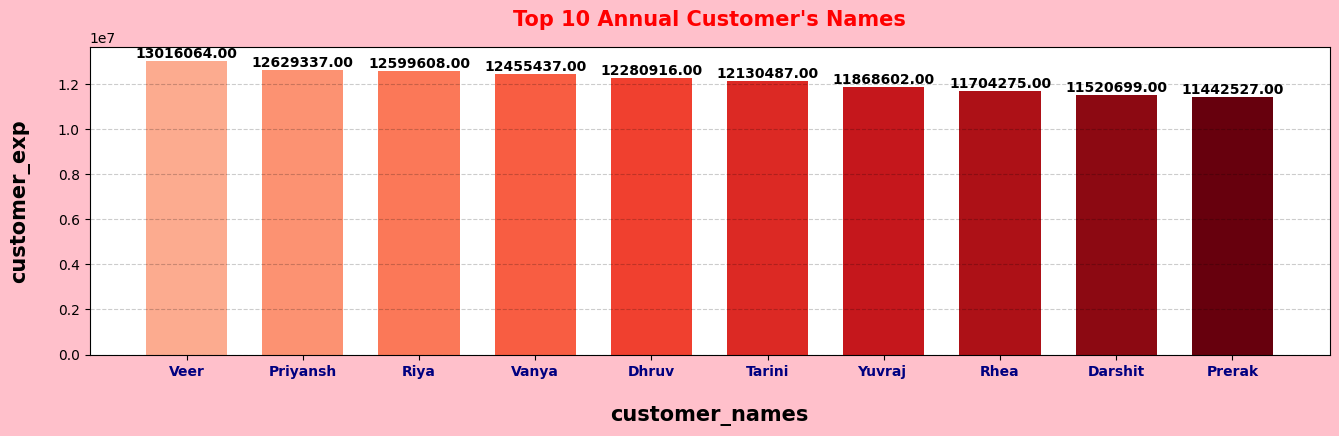

In [ ]:
# sql query

query = """
Select t.customerid,c.firstname,t.expenditure
from 
(Select customerid,
sum(totalprice) as expenditure
from salesdata 
group by customerid) t
join customers c
on t.customerid=c.customerid
order by t.expenditure desc
limit 10; """


# executing the query
top_annual_customers = read_query(query)

# creating the variables and extracting the values
customer_exp = top_annual_customers['expenditure'].values
customer_names = top_annual_customers['firstname'].values

# using cmap
cmap_val = np.linspace(0.3,1,10)
cmap=plt.cm.Reds(cmap_val)


# customize the figure size
plt.figure(figsize=(16,4),facecolor='pink')

# ploting bar graph
plt.bar(x=customer_names,height =customer_exp,color= cmap,width=0.7)

# giving title to the graph
plt.title("Top 10 Annual Customer's Names",pad=15, size=15,color='red',fontweight='bold')


# giving labels to the graph
plt.xlabel('customer_names',labelpad=20, color='black', size=15,fontweight='bold')
plt.ylabel('customer_exp',labelpad=20, c='black',size=15,fontweight='bold')


plt.xticks(c='#000080',fontweight='bold')

# applying grid
plt.grid(axis='y',alpha=0.2,color='black',ls='dashed')


# using anotation
for i in range(len(top_annual_customers)):
    plt.annotate(text=customer_exp[i],xy=(i,customer_exp[i]),fontweight='bold',
                 horizontalalignment='center',# center,right,left
                 verticalalignment='bottom') # top,bottom, center



plt.show()

# Get the top 10 Employee's Saler names

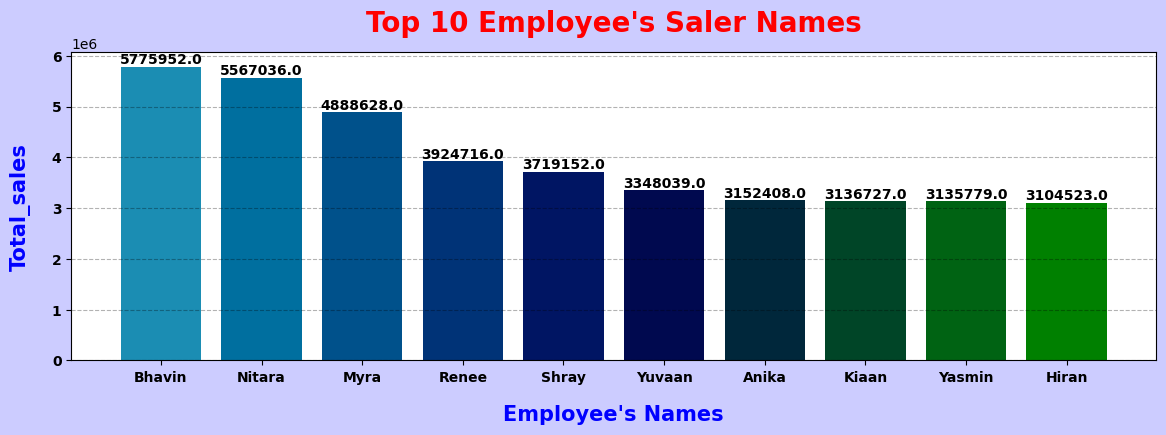

In [ ]:
query = """select 
    monthname(s.saledate ) as monthnames,
    e.firstname,
    sum(s.totalprice) as totalsales
from salesdata s
    join employees e
    on s.employeeid=e.employeeid
where monthname(saledate) = 'January'
group by  monthname(s.saledate ),e.firstname
order by totalsales desc
limit 10; """

# executing the query
df = read_query(query=query)

# changing the datatype from object to float
df['totalsales'] = df['totalsales'].astype(float)

# checking the datatype
# df.info()

# creating the variables and extracting the values
emp_names = df['firstname'].values
Total_sales = df['totalsales'].values

# creating cmap
cmap_val = np.linspace(0.3,1,10)
cmap=plt.cm.ocean_r(cmap_val)

# customize the figure size
plt.figure(figsize=(14,4),facecolor='#CCCCFF')

# ploting the bar graph
plt.bar(height=Total_sales,x=emp_names,color=cmap)

# giving title to the graph
plt.title("Top 10 Employee's Saler Names", c = 'red', pad=15 ,size=20,fontweight='bold')


# labeling to the x and y labels 
plt.xlabel('Employee\'s Names',labelpad=15,c='blue',size=15,fontweight='bold')
plt.ylabel('Total_sales',labelpad=15,c='blue',size=15,fontweight='bold')


# using anotation
for i in range(len(Total_sales)):
    plt.annotate(text=Total_sales[i],xy=(i,Total_sales[i]),fontweight='bold', color ='black',  # [i]/2
                 horizontalalignment='center',# center,right,left
                 verticalalignment='bottom') # top,bottom, center
    

# using ticks
plt.xticks(c='black',fontweight='bold')
plt.yticks(c='black',fontweight='bold')

# applying grid
plt.grid(axis='y',alpha=0.3,color='black',ls='dashed')


plt.show()
